In [1]:
#先導入資料處理會用到的模組
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series, DataFrame
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

# 可視化模組
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 機器學習模組
import sklearn

In [2]:
sns.set()

In [3]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [4]:
# test的ID欄位
testID = test['Id']

In [5]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [8]:
print('train.shape: ', train.shape)
print('test.shape: ', test.shape)

train.shape:  (1460, 81)
test.shape:  (1459, 80)


In [9]:
# 刪除'Id'欄位
train = train.drop(['Id'], axis=1)
test = test.drop(['Id'], axis=1)

In [10]:
train.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# 離群值

Text(0, 0.5, 'SalePrice')

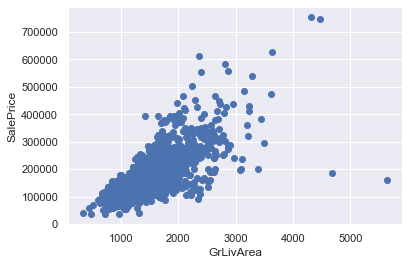

In [11]:
plt.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')

In [12]:
train[(train['GrLivArea']>4000)&(train['SalePrice']<300000)].index

Int64Index([523, 1298], dtype='int64')

In [13]:
# 對於呈線性分布的特徵，刪除較為明顯的異常點
train = train.drop(train[(train['GrLivArea']>4000)&(train['SalePrice']<300000)].index)

Text(0, 0.5, 'SalePrice')

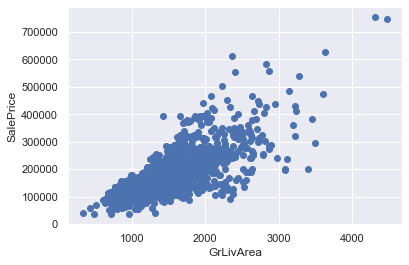

In [14]:
plt.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')

# 目標變數

In [15]:
train['SalePrice'].describe()

count      1458.000000
mean     180932.919067
std       79495.055285
min       34900.000000
25%      129925.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [16]:
from scipy.stats import *
from scipy import stats
from scipy.stats import norm, skew

mu = 180932.92 and sigma = 79467.79



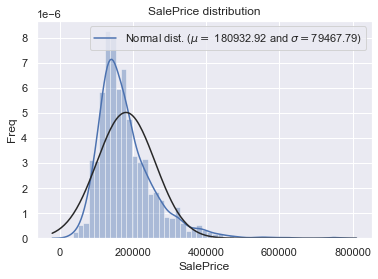

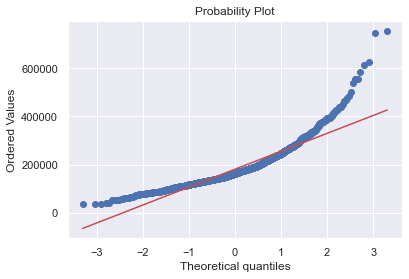

In [17]:
sns.distplot(train['SalePrice'], fit = norm)

(mu, sigma) = norm.fit(train['SalePrice'])
print('mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=${:.2f})'.format(mu, sigma)],
           loc = 'best')
plt.ylabel('Freq')
plt.title('SalePrice distribution')

fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot = plt)
plt.show()

#### Log-transformation

In [18]:
train['SalePrice'] = np.log(train['SalePrice'])

mu = 12.02 and sigma = 0.40



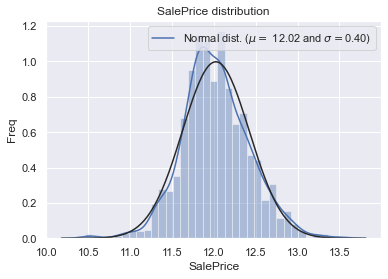

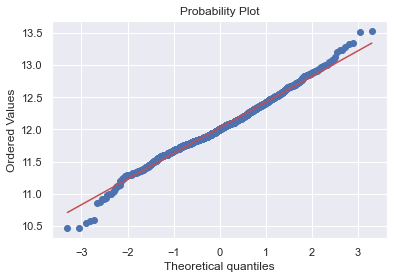

In [19]:
sns.distplot(train['SalePrice'], fit = norm)

(mu, sigma) = norm.fit(train['SalePrice'])
print('mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=${:.2f})'.format(mu, sigma)],
           loc = 'best')
plt.ylabel('Freq')
plt.title('SalePrice distribution')

fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot = plt)
plt.show()

# 特徵工程

In [20]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
all_data = pd.concat((train, test)).reset_index(drop = True)
all_data = all_data.drop(['SalePrice'], axis = 1)
print('all_data.shape: ', all_data.shape)

all_data.shape:  (2917, 79)


#### 計算缺失值

In [21]:
all_dataNA = (all_data.isnull().sum() / len(all_data)) * 100
all_dataNA = all_dataNA.drop(all_dataNA[all_dataNA == 0].index).sort_values(ascending = False)
missing_data = pd.DataFrame({'Missing Ration': all_dataNA})
print(missing_data.shape)
missing_data.head(34)

(34, 1)


,Missing Ration
PoolQC,99.691464
MiscFeature,96.400411
Alley,93.212204
Fence,80.425094
FireplaceQu,48.680151
LotFrontage,16.660953
GarageFinish,5.450806
GarageQual,5.450806
GarageCond,5.450806
GarageYrBlt,5.450806


Text(0, 0.5, 'Percent')

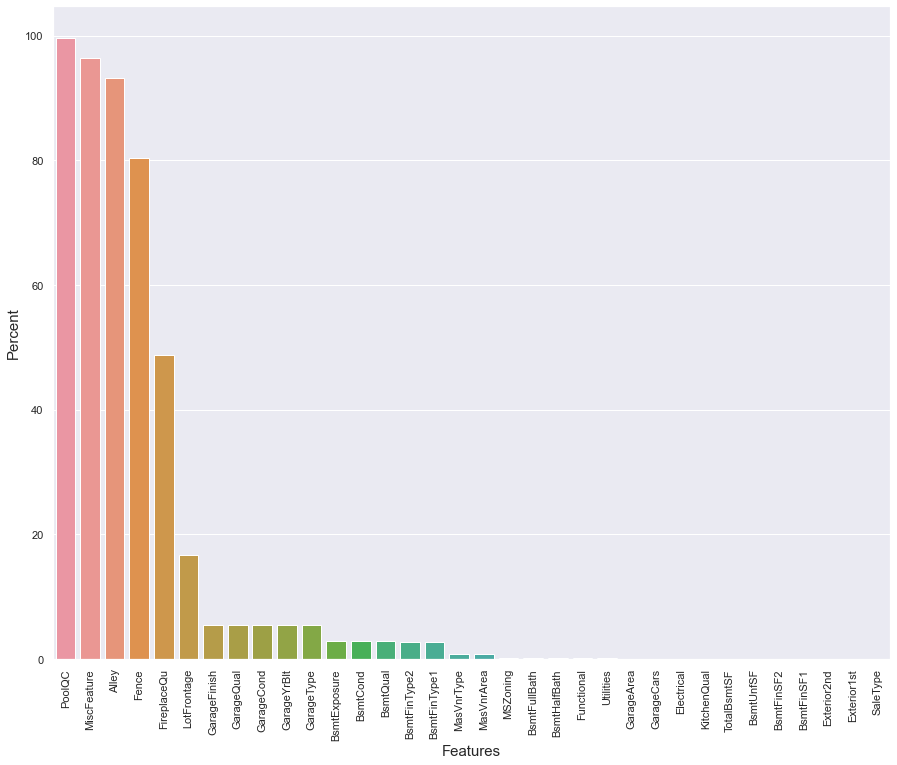

In [22]:
f, ax = plt.subplots(figsize = (15, 12))
plt.xticks(rotation = '90')
sns.barplot(x = all_dataNA.index, y = all_dataNA)
plt.xlabel('Features', fontsize = 15)
plt.ylabel('Percent', fontsize = 15)

#### Data Correlation

(37, 37)


<AxesSubplot:>

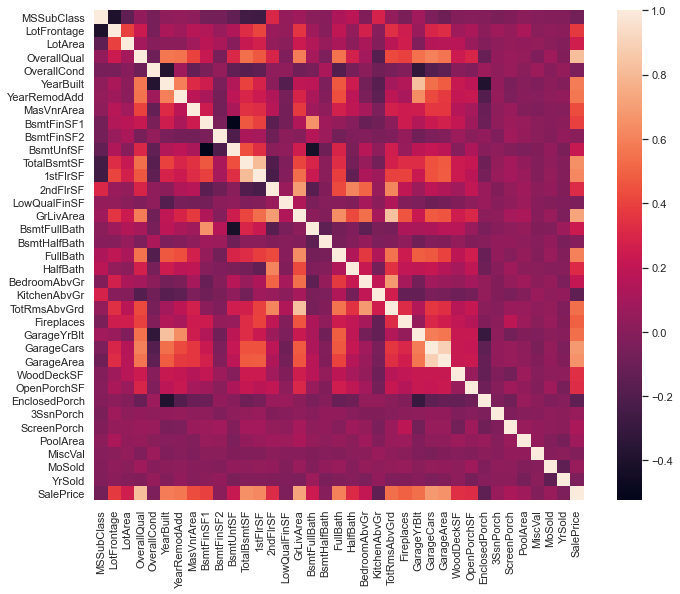

In [23]:
corrmat = train.corr()
print(corrmat.shape)
plt.subplots(figsize = (12, 9))
sns.heatmap(corrmat, square = True)

#### Imputing missing values 

In [24]:
# PoolQC
# NA --> 沒有泳池
all_data['PoolQC'] = all_data['PoolQC'].fillna('None')

In [25]:
# MiscFeature 其他類別未涵蓋的雜項功能
# NA --> 沒有其他功能
all_data['MiscFeature'] = all_data['MiscFeature'].fillna('None')

In [26]:
# Alley 通往該間房屋的巷弄類型
# NA --> 沒有巷弄
all_data['Alley'] = all_data['Alley'].fillna('None')

In [27]:
# Fence 圍欄品質
# NA --> 沒有圍欄
all_data['Fence'] = all_data['Fence'].fillna('None')

In [28]:
# FireplaceQu 壁爐品質
# NA --> 沒有壁爐
all_data['FireplaceQu'] = all_data['FireplaceQu'].fillna('None')

In [29]:
# LotFrontage 與市區的距離
# 與其附近的其他房屋相似，用該社區的'LotFrontage'中位數來填缺失值
all_data['LotFrontage'] = all_data.groupby('Neighborhood')['LotFrontage'].transform(
    lambda x: x.fillna(x.median()))

In [30]:
# GarageX 車庫相關
# NA --> 沒有車庫
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')
    
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)

In [31]:
# BsmtX 地下室相關
# NA --> 沒有地下室
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)
    
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')

In [32]:
# MasVnrX 磚石飾面相關
# NA --> 沒有磚石飾面
all_data['MasVnrType'] = all_data['MasVnrType'].fillna('None')
all_data['MasVnrArea'] = all_data['MasVnrArea'].fillna(0)

In [33]:
# MSZoning 一般分區分類
# NA --> 'RL' 是最常見的值，所以用'RL'填缺失值
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

In [34]:
# Utilities 可用的設施種類
# 只有兩個不同的值，刪除這個特徵
all_data = all_data.drop(['Utilities'], axis=1)

In [35]:
# Functional 家庭功能
# data假設為Typical
all_data['Functional'] = all_data['Functional'].fillna('Typ')

In [36]:
# Electrical 電力系統
# NA --> 'SBrkr' 是最常見的值，所以用'SBrkr'填缺失值
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

In [37]:
# KitchenQual 廚房品質
# NA --> 'TA' 是最常見的值，所以用'TA'填缺失值
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

In [38]:
# Exterior1st,  Exterior2nd房子外牆
# NA --> 'VinylSd' 是最常見的值，所以用'VinylSd'填缺失值
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

In [39]:
# SaleType 銷售類型
# NA --> 'WD' 是最常見的值，所以用'WD'填缺失值
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

In [40]:
all_dataNA = (all_data.isnull().sum() / len(all_data)) * 100
all_dataNA = all_dataNA.drop(all_dataNA[all_dataNA == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_dataNA})
missing_data.head()

,Missing Ratio


In [41]:
# MSSubClass=The building class
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)

# Changing OverallCond into a categorical variable
all_data['OverallCond'] = all_data['OverallCond'].astype(str)

# Year and month sold are transformed into categorical features.
all_data['YrSold'] = all_data['YrSold'].apply(str)
all_data['MoSold'] = all_data['MoSold'].apply(str)

In [42]:
# 收集型態為'object'的欄位
objects = []
for i in all_data.columns:
    if all_data[i].dtype == object:
        objects.append(i)

objects

['MSSubClass',
 'MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallCond',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCondition']

In [43]:
cols = ['FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold']

# 型態為'object'的欄位做 LabelEncoding
from sklearn.preprocessing import LabelEncoder
for i in cols:
    lbl = LabelEncoder()
    lbl.fit(list(all_data[i].values))
    all_data[i] = lbl.transform(list(all_data[i].values))

all_data.shape

(2917, 78)

#### 參數整合

In [44]:
# 總面積
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']
# all_data = all_data.drop(['TotalBsmtSF', '1stFlrSF', '2ndFlrSF'], axis = 1)

In [45]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)

,Skew
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.109495
LowQualFinSF,12.084539
3SsnPorch,11.372080
LandSlope,4.973254
KitchenAbvGr,4.300550
BsmtFinSF2,4.144503
EnclosedPorch,4.002344
ScreenPorch,3.945101


In [46]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

There are 59 skewed numerical features to Box Cox transform


In [47]:
from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    all_data[feat] = boxcox1p(all_data[feat], lam)
    
#all_data[skewed_features] = np.log1p(all_data[skewed_features])

In [48]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2917, 220)


#### Data Clean

In [49]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2917 entries, 0 to 2916
Columns: 220 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(59), uint8(161)
memory usage: 1.8 MB


In [50]:
train = all_data[:ntrain]
test = all_data[ntrain:]

In [51]:
print('train.shape: ', train.shape)
print('test.shape: ', test.shape)

train.shape:  (1458, 220)
test.shape:  (1459, 220)


# Modelling

In [52]:
from sklearn.linear_model import ElasticNet, Lasso, LassoCV, BayesianRidge, LassoLarsIC
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [53]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [54]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha = 0.001, random_state=1))

In [55]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.001, l1_ratio=0.38, random_state=3))

In [57]:
ridge = Ridge(alpha = 7) #調整alpha值決定正則化的強度

In [58]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [59]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.005, max_depth=6,
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [60]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.01, n_estimators=2000,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [61]:
# models = [lasso, ENet, KRR, ridge, GBoost, model_xgb, model_lgb]
# score = []
# score = pd.DataFrame(score)
# for i in models:
#     new = pd.DataFrame([[rmsle_cv(i).mean(), rmsle_cv(i).std()]])
#     score = score.append(new)
    
# score.index = ['lasso', 'ENet', 'KRR', 'Ridge', 'GBoost', 'model_xgb', 'model_lgb']
# score.columns = ['mean', 'std']
# score

[13:50:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:50:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:50:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindi

[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11

,mean,std
lasso,0.113328,0.007403
ENet,0.111773,0.007466
KRR,0.125151,0.005416
Ridge,0.115719,0.008186
GBoost,0.116732,0.008321
model_xgb,0.117776,0.006019
model_lgb,0.115092,0.006174


#### Stacking models

In [63]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [64]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, ridge),
                                                 meta_model = lasso)

score = rmsle_cv(stacked_averaged_models)
print('Stacking Averaged models score: {:.4f} ({:.4f})'.format(score.mean(), score.std()))

Stacking Averaged models score: 0.1084 (0.0074)


#### Ensembling StackedRegressor, XGBoost and LightGBM

In [65]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [66]:
stacked_averaged_models.fit(train.values, y_train)
stacked_train_pred = stacked_averaged_models.predict(train.values)
stacked_pred = np.expm1(stacked_averaged_models.predict(test.values))
print(rmsle(y_train, stacked_train_pred))

0.07987220878078308


In [68]:
model_xgb.fit(train, y_train)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = np.expm1(model_xgb.predict(test))
print(rmsle(y_train, xgb_train_pred))

[14:00:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


0.08607409359303217


In [69]:
model_lgb.fit(train, y_train)
lgb_train_pred = model_lgb.predict(train)
lgb_pred = np.expm1(model_lgb.predict(test.values))
print(rmsle(y_train, lgb_train_pred))

[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
0.08418296758804227


In [70]:
pred = stacked_pred*0.7 + xgb_pred*0.15 + lgb_pred*0.15
pred

array([120332.61762154, 156277.49833578, 186540.31428918, ...,
       169090.05336155, 118266.42406514, 223136.40354067])

In [71]:
output = pd.DataFrame({'Id': testID, 'SalePrice': pd.DataFrame(pred)[0]})
output

,Id,SalePrice
0,1461,120332.617622
1,1462,156277.498336
2,1463,186540.314289
3,1464,195728.074882
4,1465,192378.810022
...,...,...
1454,2915,84511.689853
1455,2916,82531.353411
1456,2917,169090.053362
1457,2918,118266.424065


In [72]:
output.to_csv('submission_ensemble.csv', index=False)
# ensemble
# xgb
# lgb
# stack